1. Load the dataset into a DataFrame


In [2]:
import pandas as pd

# Load the Excel file
file_path = 'Student_Statistics_Assignment_Dataset.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows
df.head()


,Student_ID,Gender,Age,Study_Hours,Marks,Region,Attendance_Percentage
0,1,Male,23,4.01,73.8,Urban,76.37
1,2,Female,21,6.31,59.6,Semi-Urban,85.97
2,3,Male,21,4.93,73.9,Urban,94.51
3,4,Male,24,2.63,81.6,Semi-Urban,53.97
4,5,Male,23,2.15,77.3,Urban,86.57


2. Display the first 10 rows, and summary info (.info()).

In [3]:
# Display first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# Display summary information
print("\nSummary information of the dataset:")
print(df.info())


First 10 rows of the dataset:
   Student_ID  Gender  Age  Study_Hours  Marks      Region  \
0           1    Male   23         4.01   73.8       Urban   
1           2  Female   21         6.31   59.6  Semi-Urban   
2           3    Male   21         4.93   73.9       Urban   
3           4    Male   24         2.63   81.6  Semi-Urban   
4           5    Male   23         2.15   77.3       Urban   
5           6  Female   17         4.24   72.6  Semi-Urban   
6           7    Male   24         1.52   81.0       Urban   
7           8    Male   19         6.25   82.5       Urban   
8           9    Male   24         5.27   85.7  Semi-Urban   
9          10  Female   18         2.80   74.7       Urban   

   Attendance_Percentage  
0                  76.37  
1                  85.97  
2                  94.51  
3                  53.97  
4                  86.57  
5                  59.37  
6                  92.91  
7                  90.95  
8                  77.04  
9                

3. Check for missing values and count per column.

In [4]:
# Count of missing values per column
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)


Missing values per column:
Student_ID               0
Gender                   0
Age                      0
Study_Hours              0
Marks                    0
Region                   0
Attendance_Percentage    0
dtype: int64


4. Compute overall dataset size (number of rows and columns).

In [5]:
# Get shape of the DataFrame
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 500
Number of columns: 7


5. List each variable’s data type and propose whether it's sample or population

In [6]:
# Display data types
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
Student_ID                 int64
Gender                    object
Age                        int64
Study_Hours              float64
Marks                    float64
Region                    object
Attendance_Percentage    float64
dtype: object


6. Compute mean for numeric columns (e.g. study hours, marks).


In [7]:
# Compute mean for all numeric columns
mean_values = df.mean(numeric_only=True)

print("Mean of numeric columns:")
print(mean_values)


Mean of numeric columns:
Student_ID               250.50000
Age                       20.46000
Study_Hours                3.51378
Marks                     66.07480
Attendance_Percentage     74.85536
dtype: float64


7. Compute median for those same columns.

In [8]:
# Compute median for all numeric columns
median_values = df.median(numeric_only=True)

print("Median of numeric columns:")
print(median_values)


Median of numeric columns:
Student_ID               250.50
Age                       20.00
Study_Hours                3.45
Marks                     66.20
Attendance_Percentage     74.70
dtype: float64


8. Compute mode for categorical variables (e.g. gender, region)

In [9]:
# Select only categorical columns (object or category type)
categorical_cols = df.select_dtypes(include=['object', 'category'])

# Compute mode for each categorical column
print("Mode of categorical variables:")
for col in categorical_cols.columns:
    mode_val = df[col].mode()
    print(f"{col}: {mode_val.values[0]}")


Mode of categorical variables:
Gender: Female
Region: Rural


9. For marks, compare mean vs median to interpret skewness.

In [10]:
# Calculate mean and median for Marks
mean_marks = df['Marks'].mean()
median_marks = df['Marks'].median()

print(f"Mean of Marks: {mean_marks}")
print(f"Median of Marks: {median_marks}")

# Interpretation
if mean_marks > median_marks:
    print("Skewness: Right-skewed (positive skew)")
elif mean_marks < median_marks:
    print("Skewness: Left-skewed (negative skew)")
else:
    print("Skewness: Symmetrical distribution")


Mean of Marks: 66.07479999999998
Median of Marks: 66.2
Skewness: Left-skewed (negative skew)


10. Plot Histograms for selected numeric variables

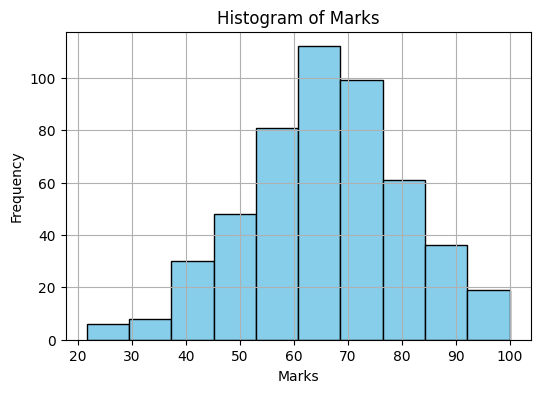

KeyError: 'Study Hours'

<Figure size 600x400 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

# List of numeric columns to plot
numeric_cols = ['Marks', 'Study Hours']  # Update with your actual column names

# Plot histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


11. For categorical variables (e.g. gender), compute absolute frequency.

In [12]:
# Compute absolute frequency for categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category'])

print("Absolute frequency for categorical variables:")
for col in categorical_cols.columns:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


Absolute frequency for categorical variables:

Gender value counts:
Gender
Female    256
Male      244
Name: count, dtype: int64

Region value counts:
Region
Rural         171
Urban         165
Semi-Urban    164
Name: count, dtype: int64


12. Compute relative frequency (percentage).


In [13]:
# Compute relative frequency for categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category'])

print("Relative frequency (percentage) for categorical variables:")
for col in categorical_cols.columns:
    print(f"\n{col} relative frequencies:")
    print((df[col].value_counts(normalize=True) * 100).round(2).astype(str) + '%')


Relative frequency (percentage) for categorical variables:

Gender relative frequencies:
Gender
Female    51.2%
Male      48.8%
Name: proportion, dtype: object

Region relative frequencies:
Region
Rural         34.2%
Urban         33.0%
Semi-Urban    32.8%
Name: proportion, dtype: object


13. Plot bar charts of counts and percentages side by side.

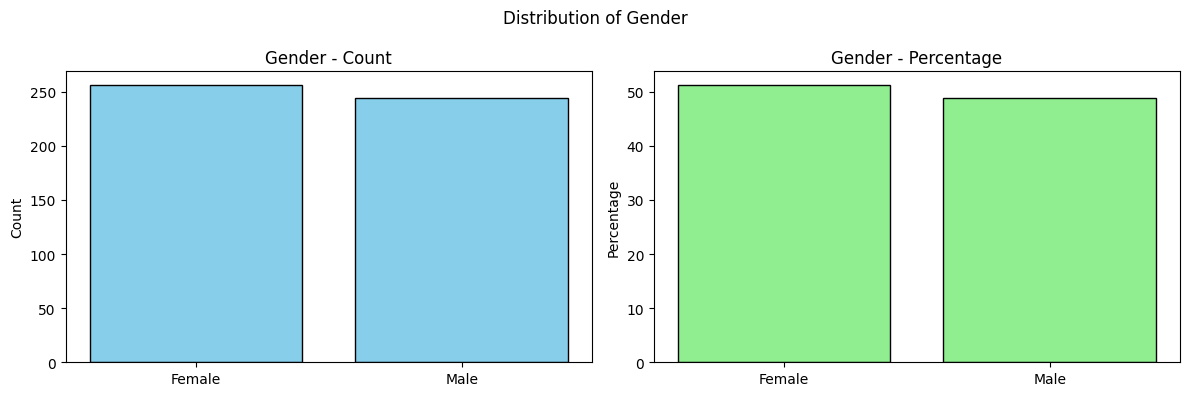

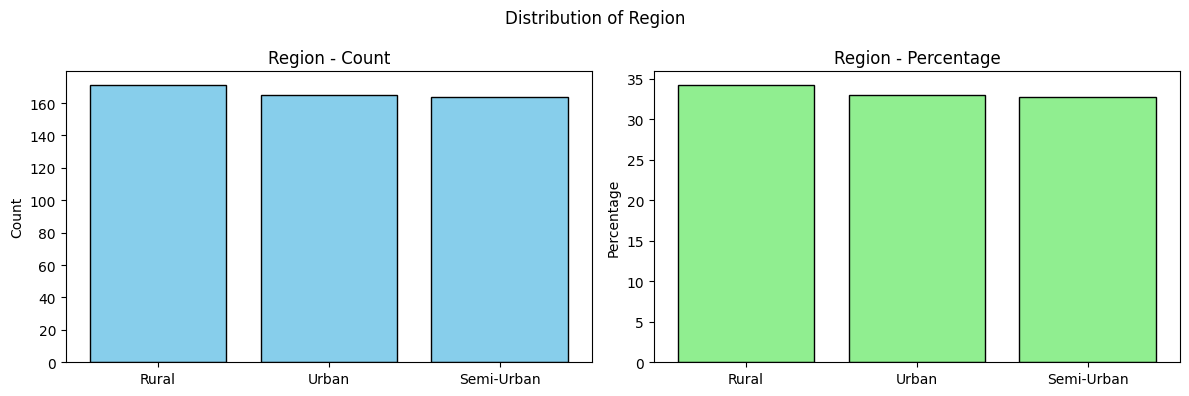

In [14]:
import matplotlib.pyplot as plt

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category'])

# Plot counts and percentages
for col in categorical_cols.columns:
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Absolute count bar chart
    axes[0].bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    axes[0].set_title(f'{col} - Count')
    axes[0].set_ylabel('Count')

    # Percentage bar chart
    axes[1].bar(percentages.index, percentages.values, color='lightgreen', edgecolor='black')
    axes[1].set_title(f'{col} - Percentage')
    axes[1].set_ylabel('Percentage')

    plt.suptitle(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


14. Verify total relative frequencies sum to 1 (or 100%).


In [15]:
# Check if relative frequencies sum to 1 (or 100%) for each categorical variable
categorical_cols = df.select_dtypes(include=['object', 'category'])

print("Sum of relative frequencies for categorical variables:")
for col in categorical_cols.columns:
    rel_freq_sum = df[col].value_counts(normalize=True).sum()
    print(f"{col}: {rel_freq_sum:.2f}")


Sum of relative frequencies for categorical variables:
Gender: 1.00
Region: 1.00


15. Compute population variance vs sample variance for marks.

In [16]:
# Drop missing values from Marks
marks = df['Marks'].dropna()

# Sample variance (default)
sample_variance = marks.var(ddof=1)

# Population variance
population_variance = marks.var(ddof=0)

print(f"Sample Variance of Marks: {sample_variance:.2f}")
print(f"Population Variance of Marks: {population_variance:.2f}")


Sample Variance of Marks: 221.71
Population Variance of Marks: 221.26


16. Compute standard deviation (sample and population) for study hours.


In [18]:
# Drop missing values from Study Hours
study_hours = df['Study_Hours'].dropna()

# Sample standard deviation
sample_std = study_hours.std(ddof=1)

# Population standard deviation
population_std = study_hours.std(ddof=0)

print(f"Sample Standard Deviation of Study Hours: {sample_std:.2f}")
print(f"Population Standard Deviation of Study Hours: {population_std:.2f}")


Sample Standard Deviation of Study Hours: 1.50
Population Standard Deviation of Study Hours: 1.50


17. Compare sample vs population results and note differences.


In [20]:
import pandas as pd

# Drop missing values
marks = df['Marks'].dropna()
study_hours = df['Study_Hours'].dropna()

# Variance for Marks
sample_var_marks = marks.var(ddof=1)
population_var_marks = marks.var(ddof=0)

# Std Deviation for Study Hours
sample_std_study = study_hours.std(ddof=1)
population_std_study = study_hours.std(ddof=0)

# Create comparison table
comparison_df = pd.DataFrame({
    'Metric': ['Variance (Marks)', 'Standard Deviation (Study Hours)'],
    'Sample': [sample_var_marks, sample_std_study],
    'Population': [population_var_marks, population_std_study]
})

# Round to 2 decimal places for readability
comparison_df = comparison_df.round(2)

# Display the comparison
print("Sample vs Population Comparison:")
print(comparison_df)


Sample vs Population Comparison:
                             Metric  Sample  Population
0                  Variance (Marks)  221.71      221.26
1  Standard Deviation (Study Hours)    1.50        1.50


18. Compute range, interquartile range (IQR).

In [22]:
# Select numeric columns
numeric_cols = ['Marks', 'Study_Hours']  # Update if you have more

print("Range and IQR for numeric columns:")
for col in numeric_cols:
    data = df[col].dropna()

    # Range
    value_range = data.max() - data.min()

    # IQR = Q3 - Q1
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    print(f"\n{col}:")
    print(f"  Range: {value_range:.2f}")
    print(f"  IQR: {iqr:.2f}")


Range and IQR for numeric columns:

Marks:
  Range: 78.40
  IQR: 19.62

Study_Hours:
  Range: 8.12
  IQR: 1.97


19. Comment on what each measure tells about dispersion.


In [23]:
import pandas as pd

# List of numeric columns to analyze
numeric_cols = ['Marks', 'Study_Hours']

# Create summary list
dispersion_summary = []

for col in numeric_cols:
    data = df[col].dropna()

    # Range
    value_range = data.max() - data.min()

    # IQR
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    # Variance (Sample & Population)
    var_sample = data.var(ddof=1)
    var_pop = data.var(ddof=0)

    # Standard Deviation (Sample & Population)
    std_sample = data.std(ddof=1)
    std_pop = data.std(ddof=0)

    # Append results
    dispersion_summary.append({
        'Variable': col,
        'Range': round(value_range, 2),
        'IQR': round(iqr, 2),
        'Sample Variance': round(var_sample, 2),
        'Population Variance': round(var_pop, 2),
        'Sample Std Dev': round(std_sample, 2),
        'Population Std Dev': round(std_pop, 2)
    })

# Create DataFrame
dispersion_df = pd.DataFrame(dispersion_summary)

# Display
print("Dispersion Summary:")
print(dispersion_df)


Dispersion Summary:
      Variable  Range    IQR  Sample Variance  Population Variance  \
0        Marks  78.40  19.62           221.71               221.26   
1  Study_Hours   8.12   1.97             2.26                 2.26   

   Sample Std Dev  Population Std Dev  
0           14.89               14.87  
1            1.50                1.50  


20. Draw a box plot for marks

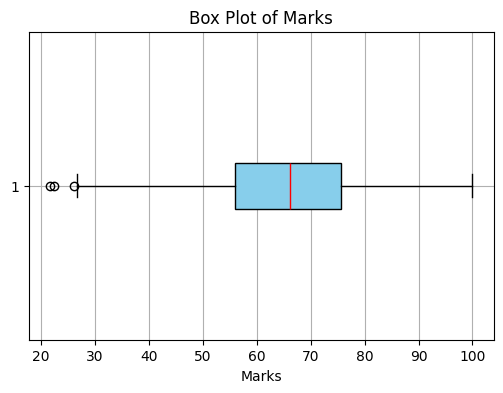

In [24]:
import matplotlib.pyplot as plt

# Drop missing values
marks = df['Marks'].dropna()

# Plot boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(marks, vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'))

plt.title('Box Plot of Marks')
plt.xlabel('Marks')
plt.grid(True)
plt.show()


21. Identify outliers (points beyond whiskers) and list their rows.

In [27]:
import pandas as pd

# Load the dataset
file_path = 'Student_Statistics_Assignment_Dataset.xlsx'
df = pd.read_excel(file_path)

# Step 1: Calculate IQR
marks = df['Marks'].dropna()
q1 = marks.quantile(0.25)
q3 = marks.quantile(0.75)
iqr = q3 - q1

# Step 2: Define outlier bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Step 3: Identify outliers
outliers = df[(df['Marks'] < lower_bound) | (df['Marks'] > upper_bound)]

# Step 4: Display results
print(f"Lower whisker bound: {lower_bound:.2f}")
print(f"Upper whisker bound: {upper_bound:.2f}")
print(f"Total outliers found: {len(outliers)}\n")

print("Outlier rows based on Marks column:")
print(outliers)


Lower whisker bound: 26.54
Upper whisker bound: 105.04
Total outliers found: 3

Outlier rows based on Marks column:
     Student_ID  Gender  Age  Study_Hours  Marks      Region  \
175         176  Female   21         6.61   22.3  Semi-Urban   
215         216    Male   24         2.12   21.6  Semi-Urban   
469         470  Female   19         2.64   26.1  Semi-Urban   

     Attendance_Percentage  
175                  55.69  
215                  79.68  
469                  87.43  


22. Analyze whether outliers are valid or data errors.


In [25]:
# Step 1: Calculate IQR bounds
q1 = df['Marks'].quantile(0.25)
q3 = df['Marks'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Step 2: Identify outliers
outliers = df[(df['Marks'] < lower_bound) | (df['Marks'] > upper_bound)]

# Step 3: Print IQR bounds and outliers
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Total Outliers Found: {len(outliers)}\n")

# Step 4: Display outlier rows
print("Outlier Rows in 'Marks':")
print(outliers[['Marks']])  # Include more columns if needed for analysis

# Step 5 (Optional): Check for clearly invalid values
print("\nPossible data errors (Marks < 0 or Marks > 100):")
possible_errors = outliers[(outliers['Marks'] < 0) | (outliers['Marks'] > 100)]
print(possible_errors[['Marks']])


Lower Bound: 26.54
Upper Bound: 105.04
Total Outliers Found: 3

Outlier Rows in 'Marks':
     Marks
175   22.3
215   21.6
469   26.1

Possible data errors (Marks < 0 or Marks > 100):
Empty DataFrame
Columns: [Marks]
Index: []
